# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# See distribution

In [3]:
df.shape

(10000, 3)

<Axes: ylabel='Density'>

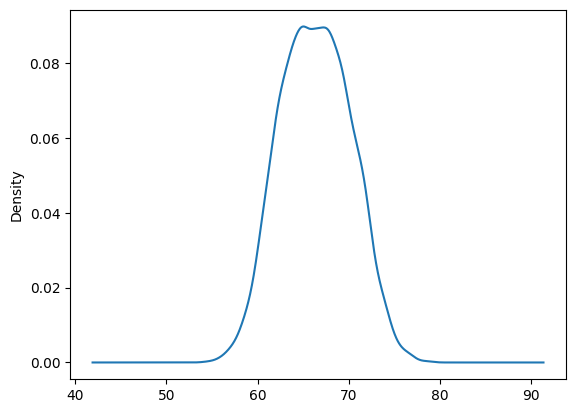

In [5]:
df['Height'].plot(kind='kde')

In [6]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: ylabel='Height'>

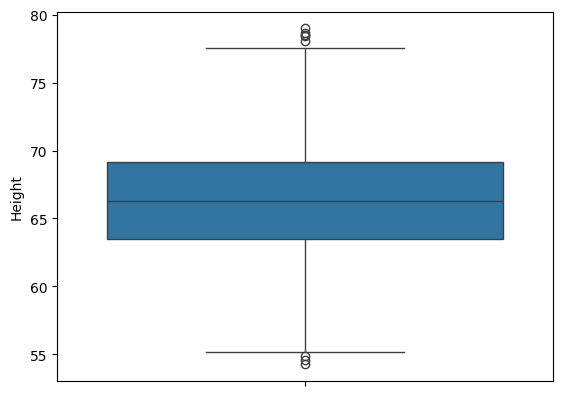

In [9]:
sns.boxplot(data=df['Height'])

# Find `upper_limit` and `lower_limit`
Ratio : 99% and 1%

In [10]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [11]:
lower_limit, upper_limit

(58.13441158671655, 74.7857900583366)

## See the outlier values

In [14]:
df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# 1. Trimming

In [15]:
df_trim = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]

In [16]:
df_trim

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [17]:
df_trim.shape

(9800, 3)

<Axes: ylabel='Density'>

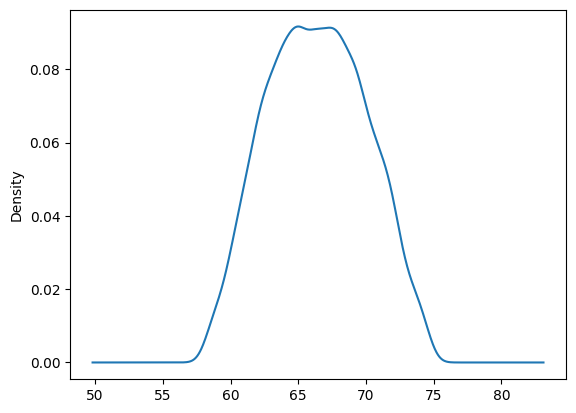

In [18]:
df_trim['Height'].plot(kind='kde')

<Axes: ylabel='Height'>

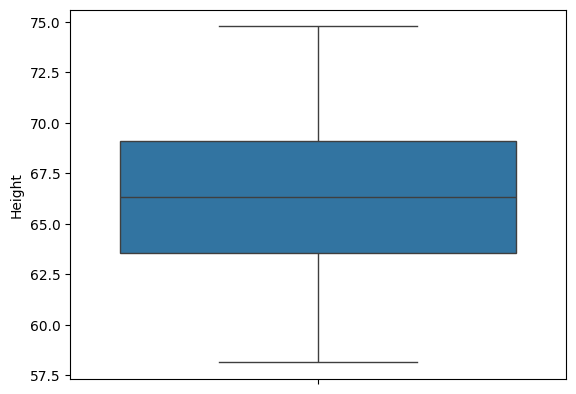

In [21]:
sns.boxplot(df_trim['Height'])

In [19]:
df_trim['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714


# Caping

In [27]:
# using where(condition, true, false)
df_cap = df.copy()
df_cap['Height'] = np.where(
                            df['Height'] < lower_limit,
                            lower_limit,
                            np.where(
                                    df['Height'] > upper_limit,
                                    upper_limit,
                                    df['Height']
                            )
                            )

In [28]:
df_cap['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<Axes: ylabel='Density'>

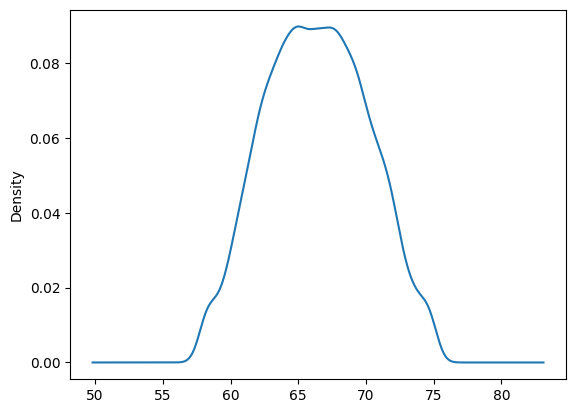

In [29]:
df_cap['Height'].plot(kind='kde')

<Axes: ylabel='Height'>

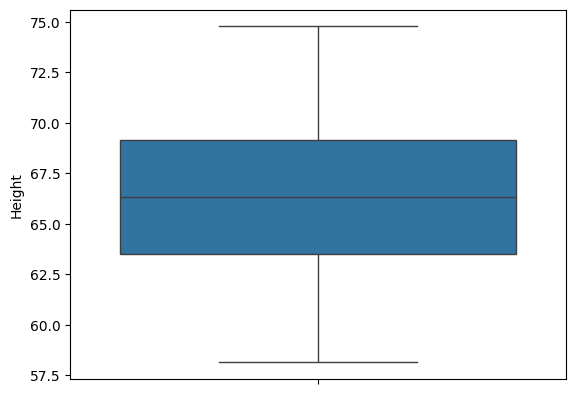

In [30]:
sns.boxplot(df_cap['Height'])